In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import time

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/PRAK DATA MINING/Pertemuan 4/data jumlah penerbit akta.csv")
df

tahun  triwulan           nama_kota   nama_kecamatan      nama_kelurahan   \
0    2021         1  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR          P. PANGGANG   
1    2021         1  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR            P. KELAPA   
2    2021         1       JAKARTA PUSAT      TANAH ABANG               GELORA   
3    2021         1       JAKARTA PUSAT      TANAH ABANG      BENDUNGAN HILIR   
4    2021         1       JAKARTA PUSAT      TANAH ABANG        KARET TENGSIN   
5    2021         1       JAKARTA PUSAT      TANAH ABANG           PETAMBURAN   
6    2021         1       JAKARTA PUSAT      TANAH ABANG         KEBON MELATI   
7    2021         1       JAKARTA PUSAT      TANAH ABANG         KEBON KACANG   
8    2021         1       JAKARTA PUSAT      TANAH ABANG         KAMPUNG BALI   
9    2021         1       JAKARTA PUSAT       JOHAR BARU           JOHAR BARU   
10   2021         1       JAKARTA PUSAT       JOHAR BARU         KAMPUNG RAWA   
11   2021         1       JAKARTA PUSAT       JOHAR BARU                GALUR   
12   2021         1       JAKARTA PUSAT       JOHAR BARU         TANAH TINGGI   
13   2021         1       JAKARTA UTARA      PENJARINGAN          PENJARINGAN   
14   2021         1       JAKARTA UTARA      PENJARINGAN          KAMAL MUARA   
15   2021         1       JAKARTA UTARA      PENJARINGAN          KAPUK MUARA   
16   2021         1       JAKARTA UTARA      PENJARINGAN            PEJAGALAN   
17   2021         1       JAKARTA UTARA      PENJARINGAN                PLUIT   
18   2021         1       JAKARTA UTARA    TANJUNG PRIOK        TANJUNG PRIOK   
19   2021         1       JAKARTA UTARA    TANJUNG PRIOK          SUNTER JAYA   
20   2021         1       JAKARTA UTARA    TANJUNG PRIOK             PAPANGGO   
21   2021         1       JAKARTA UTARA    TANJUNG PRIOK         SUNGAI BAMBU   
22   2021         1       JAKARTA UTARA    TANJUNG PRIOK         KEBON BAWANG   
23   2021         1       JAKARTA UTARA    TANJUNG PRIOK         SUNTER AGUNG   
24   2021         1       JAKARTA UTARA    TANJUNG PRIOK              WARAKAS   
25   2021         1       JAKARTA UTARA             KOJA                 KOJA   
26   2021         1       JAKARTA UTARA             KOJA           TUGU UTARA   
27   2021         1       JAKARTA UTARA             KOJA                LAGOA   
28   2021         1       JAKARTA UTARA             KOJA     RAWA BADAK UTARA   
29   2021         1       JAKARTA UTARA             KOJA         TUGU SELATAN   
30   2021         1       JAKARTA UTARA             KOJA   RAWA BADAK SELATAN   
31   2021         1       JAKARTA UTARA        CILINCING            CILINCING   
32   2021         1       JAKARTA UTARA        CILINCING             SUKAPURA   
33   2021         1       JAKARTA UTARA        CILINCING              MARUNDA   
34   2021         1       JAKARTA UTARA        CILINCING            KALI BARU   
35   2021         1       JAKARTA UTARA        CILINCING         SEMPER TIMUR   
36   2021         1       JAKARTA UTARA        CILINCING              ROROTAN   
37   2021         1       JAKARTA UTARA        CILINCING         SEMPER BARAT   
38   2021         1       JAKARTA UTARA       PADEMANGAN     PADEMANGAN TIMUR   
39   2021         1       JAKARTA UTARA       PADEMANGAN     PADEMANGAN BARAT   
40   2021         1       JAKARTA UTARA       PADEMANGAN                ANCOL   
41   2021         1       JAKARTA UTARA    KELAPA GADING  KELAPA GADING TIMUR   
42   2021         1       JAKARTA UTARA    KELAPA GADING       PEGANGSAAN DUA   
43   2021         1       JAKARTA UTARA    KELAPA GADING  KELAPA GADING BARAT   
44   2021         1       JAKARTA BARAT       CENGKARENG     CENGKARENG BARAT   
45   2021         1       JAKARTA BARAT       CENGKARENG         DURI KOSAMBI   
46   2021         1       JAKARTA BARAT       CENGKARENG           RAWA BUAYA   
47   2021         1       JAKARTA BARAT       CENGKARENG   KEDAUNG KALI ANGKE   
48   2021         1       JAKARTA B

In [ ]:
d1 = pd.get_dummies(df.nama_kota)
d1

JAKARTA BARAT  JAKARTA PUSAT  JAKARTA UTARA  KAB.ADM.KEP.SERIBU
0               0              0              0                   1
1               0              0              0                   1
2               0              1              0                   0
3               0              1              0                   0
4               0              1              0                   0
5               0              1              0                   0
6               0              1              0                   0
7               0              1              0                   0
8               0              1              0                   0
9               0              1              0                   0
10              0              1              0                   0
11              0              1              0                   0
12              0              1              0                   0
13              0              0              1                   0
14              0              0              1                   0
15              0              0              1                   0
16              0              0              1                   0
17              0              0              1                   0
18              0              0              1                   0
19              0              0              1                   0
20              0              0              1                   0
21              0              0              1                   0
22              0              0              1                   0
23              0              0              1                   0
24              0              0              1                   0
25              0              0              1                   0
26              0              0              1                   0
27              0              0              1                   0
28              0              0              1                   0
29              0              0              1                   0
30              0              0              1                   0
31              0              0              1                   0
32              0              0              1                   0
33              0              0              1                   0
34              0              0              1                   0
35              0              0              1                   0
36              0              0              1                   0
37              0              0              1                   0
38              0              0              1                   0
39              0              0              1                   0
40              0              0              1                   0
41              0              0              1                   0
42              0              0              1                   0
43              0              0              1                   0
44              1              0              0                   0
45              1              0              0                   0
46              1              0              0                   0
47              1              0              0                   0
48              1              0              0                   0

In [ ]:
d2 = pd.get_dummies(df.nama_kecamatan)
d2

CENGKARENG  CILINCING  JOHAR BARU  KELAPA GADING  KEP. SERIBU UTR  KOJA  \
0            0          0           0              0                1     0   
1            0          0           0              0                1     0   
2            0          0           0              0                0     0   
3            0          0           0              0                0     0   
4            0          0           0              0                0     0   
5            0          0           0              0                0     0   
6            0          0           0              0                0     0   
7            0          0           0              0                0     0   
8            0          0           0              0                0     0   
9            0          0           1              0                0     0   
10           0          0           1              0                0     0   
11           0          0           1              0                0     0   
12           0          0           1              0                0     0   
13           0          0           0              0                0     0   
14           0          0           0              0                0     0   
15           0          0           0              0                0     0   
16           0          0           0              0                0     0   
17           0          0           0              0                0     0   
18           0          0           0              0                0     0   
19           0          0           0              0                0     0   
20           0          0           0              0                0     0   
21           0          0           0              0                0     0   
22           0          0           0              0                0     0   
23           0          0           0              0                0     0   
24           0          0           0              0                0     0   
25           0          0           0              0                0     1   
26           0          0           0              0                0     1   
27           0          0           0              0                0     1   
28           0          0           0              0                0     1   
29           0          0           0              0                0     1   
30           0          0           0              0                0     1   
31           0          1           0              0                0     0   
32           0          1           0              0                0     0   
33           0          1           0              0                0     0   
34           0          1           0              0                0     0   
35           0          1           0              0                0     0   
36           0          1           0              0                0     0   
37           0          1           0              0                0     0   
38           0          0           0              0                0     0   
39           0          0           0              0                0     0   
40           0          0           0              0                0     0   
41           0          0           0              1                0     0   
42           0          0           0              1                0     0   
43           0          0           0              1                0     0   
44           1          0           0              0                0     0   
45           1          0           0              0                0     0   
46           1          0           0              0                0     0   
47           1          0           0              0                0     0   
48           1          0           0              0                0     0   

    PADEMANGAN  PENJARINGAN  TANAH ABANG  TANJUNG PRI

In [ ]:
d3 = pd.get_dummies(df['nama_kelurahan '])
d3

ANCOL  BENDUNGAN HILIR  CENGKARENG BARAT  CILINCING  DURI KOSAMBI  GALUR  \
0       0                0                 0          0             0      0   
1       0                0                 0          0             0      0   
2       0                0                 0          0             0      0   
3       0                1                 0          0             0      0   
4       0                0                 0          0             0      0   
5       0                0                 0          0             0      0   
6       0                0                 0          0             0      0   
7       0                0                 0          0             0      0   
8       0                0                 0          0             0      0   
9       0                0                 0          0             0      0   
10      0                0                 0          0             0      0   
11      0                0                 0          0             0      1   
12      0                0                 0          0             0      0   
13      0                0                 0          0             0      0   
14      0                0                 0          0             0      0   
15      0                0                 0          0             0      0   
16      0                0                 0          0             0      0   
17      0                0                 0          0             0      0   
18      0                0                 0          0             0      0   
19      0                0                 0          0             0      0   
20      0                0                 0          0             0      0   
21      0                0                 0          0             0      0   
22      0                0                 0          0             0      0   
23      0                0                 0          0             0      0   
24      0                0                 0          0             0      0   
25      0                0                 0          0             0      0   
26      0                0                 0          0             0      0   
27      0                0                 0          0             0      0   
28      0                0                 0          0             0      0   
29      0                0                 0          0             0      0   
30      0                0                 0          0             0      0   
31      0                0                 0          1             0      0   
32      0                0                 0          0             0      0   
33      0                0                 0          0             0      0   
34      0                0                 0          0             0      0   
35      0                0                 0          0             0      0   
36      0                0                 0          0             0      0   
37      0                0                 0          0             0      0   
38      0                0                 0          0             0      0   
39      0                0                 0          0             0      0   
40      1                0                 0          0             0      0   
41      0                0                 0          0             0      0   
42      0                0                 0          0             0      0   
43      0                0                 0          0             0      0   
44      0                0                 1          0             0      0   
45      0                0                 0          0             1      0   
46      0                0                 0          0             0      0   
47      0                0                 0          0             0      0   
48      0                0                 0          0             0      0   

   

In [ ]:
d4 = pd.get_dummies(df.jenis_kelamin)
d4

Laki-Laki
0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
30          1
31          1
32          1
33          1
34          1
35          1
36          1
37          1
38          1
39          1
40          1
41          1
42          1
43          1
44          1
45          1
46          1
47          1
48          1

In [ ]:
tahun = df['tahun']
triwulan = df['triwulan']
jmlh = df.jumlah


In [ ]:
hasil = pd.concat([tahun,triwulan,d1,d2,d3,d4,jm],axis='columns')
hasil

tahun  triwulan  JAKARTA BARAT  JAKARTA PUSAT  JAKARTA UTARA  \
0    2021         1              0              0              0   
1    2021         1              0              0              0   
2    2021         1              0              1              0   
3    2021         1              0              1              0   
4    2021         1              0              1              0   
5    2021         1              0              1              0   
6    2021         1              0              1              0   
7    2021         1              0              1              0   
8    2021         1              0              1              0   
9    2021         1              0              1              0   
10   2021         1              0              1              0   
11   2021         1              0              1              0   
12   2021         1              0              1              0   
13   2021         1              0              0              1   
14   2021         1              0              0              1   
15   2021         1              0              0              1   
16   2021         1              0              0              1   
17   2021         1              0              0              1   
18   2021         1              0              0              1   
19   2021         1              0              0              1   
20   2021         1              0              0              1   
21   2021         1              0              0              1   
22   2021         1              0              0              1   
23   2021         1              0              0              1   
24   2021         1              0              0              1   
25   2021         1              0              0              1   
26   2021         1              0              0              1   
27   2021         1              0              0              1   
28   2021         1              0              0              1   
29   2021         1              0              0              1   
30   2021         1              0              0              1   
31   2021         1              0              0              1   
32   2021         1              0              0              1   
33   2021         1              0              0              1   
34   2021         1              0              0              1   
35   2021         1              0              0              1   
36   2021         1              0              0              1   
37   2021         1              0              0              1   
38   2021         1              0              0              1   
39   2021         1              0              0              1   
40   2021         1              0              0              1   
41   2021         1              0              0              1   
42   2021         1              0              0              1   
43   2021         1              0              0              1   
44   2021         1              1              0              0   
45   2021         1              1              0              0   
46   2021         1              1              0              0   
47   2021         1              1              0              0   
48   2021         1              1              0              0   

    KAB.ADM.KEP.SERIBU  CENGKARENG  CILINCING  JOHAR BARU  KELAPA GADING  ...  \
0                    1           0          0           0              0  ...   
1                    1           0          0           0              0  ...   
2                    0           0          0           0              0  ...   
3                    0           0          0           0              0  ...   
4                    0           0          0           0              0  ...   
5                    0           0          0           0              0  ...   
6                    0           0  

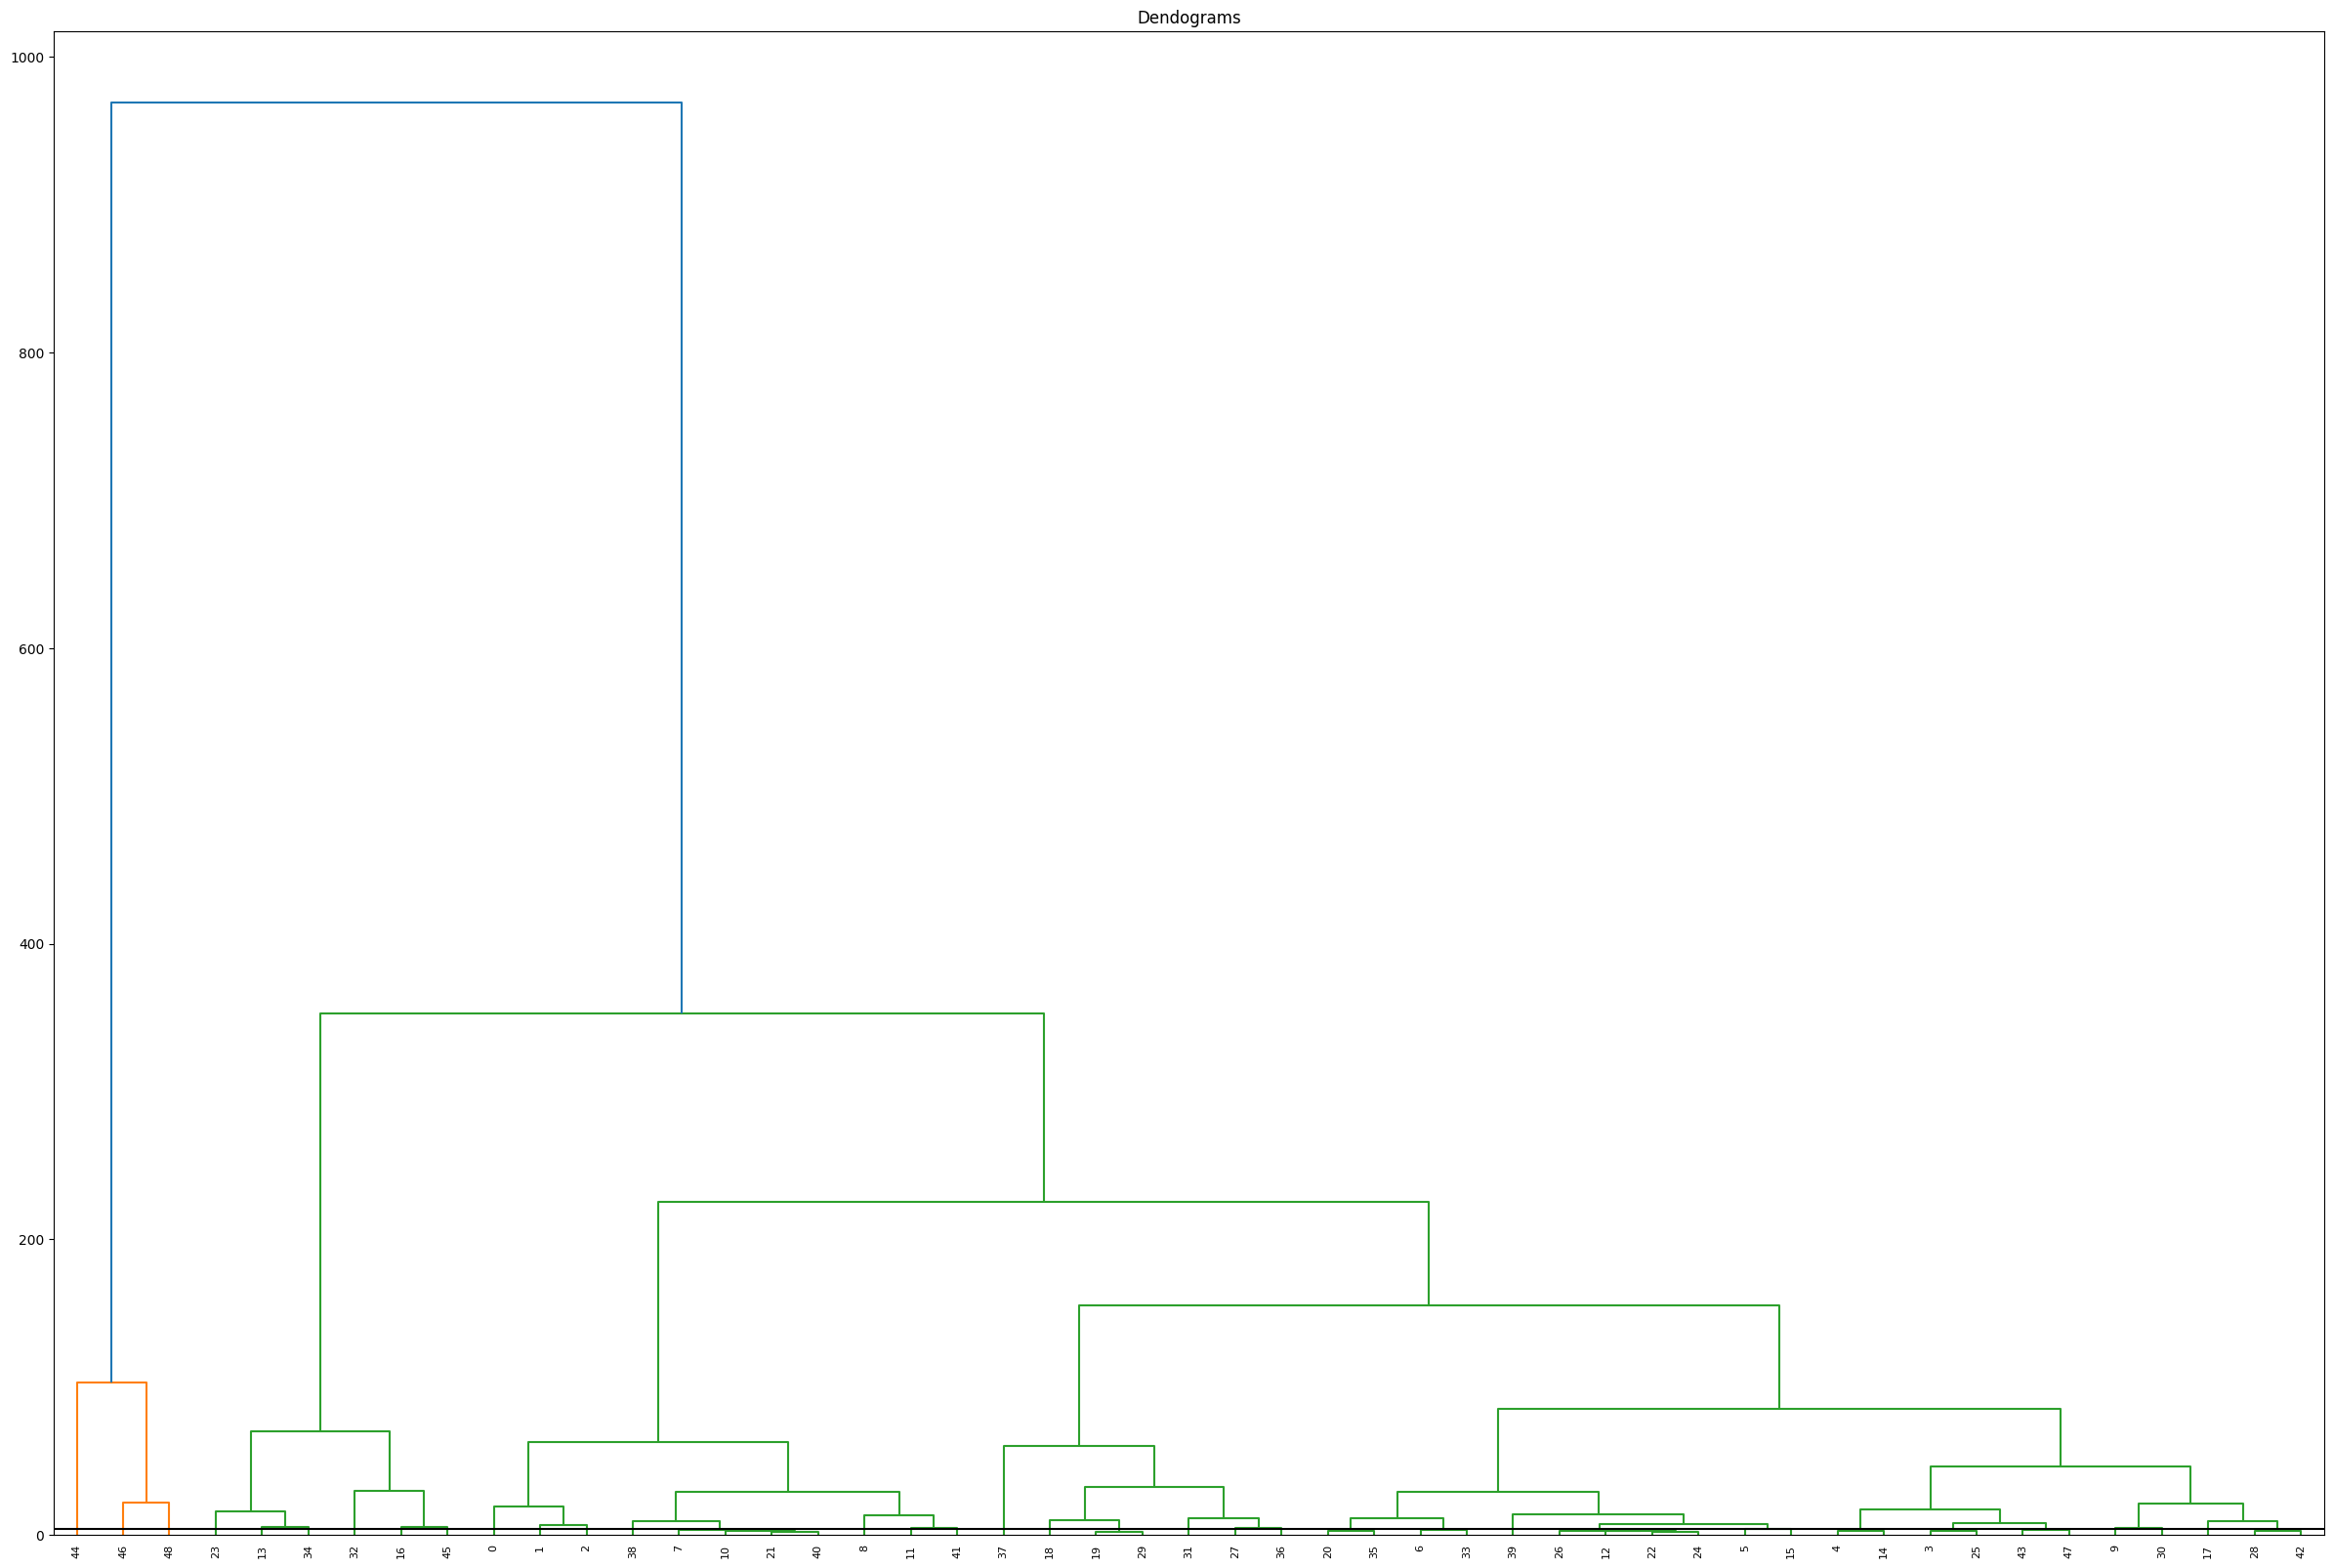

In [ ]:
plt.figure(figsize=(30, 20))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(hasil, method='complete'))
plt.axhline(y=4, c='k')
plt.savefig('plt.png', format='png', bbox_inches='tight')
# plt.savefig('chart.png',figsize=(300, 300),dpi=300)

In [ ]:
st = time.time()
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster_result = clustering.fit_predict(hasil)
clustering.fit_predict(hasil)

et = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 0.017697572708129883 seconds


In [ ]:
print(f'Silhouette Score : {silhouette_score(hasil, cluster_result)}')

Silhouette Score : 0.8696561294134212


In [ ]:
df['cluster'] = cluster_result
df

tahun  triwulan           nama_kota   nama_kecamatan      nama_kelurahan   \
0    2021         1  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR          P. PANGGANG   
1    2021         1  KAB.ADM.KEP.SERIBU  KEP. SERIBU UTR            P. KELAPA   
2    2021         1       JAKARTA PUSAT      TANAH ABANG               GELORA   
3    2021         1       JAKARTA PUSAT      TANAH ABANG      BENDUNGAN HILIR   
4    2021         1       JAKARTA PUSAT      TANAH ABANG        KARET TENGSIN   
5    2021         1       JAKARTA PUSAT      TANAH ABANG           PETAMBURAN   
6    2021         1       JAKARTA PUSAT      TANAH ABANG         KEBON MELATI   
7    2021         1       JAKARTA PUSAT      TANAH ABANG         KEBON KACANG   
8    2021         1       JAKARTA PUSAT      TANAH ABANG         KAMPUNG BALI   
9    2021         1       JAKARTA PUSAT       JOHAR BARU           JOHAR BARU   
10   2021         1       JAKARTA PUSAT       JOHAR BARU         KAMPUNG RAWA   
11   2021         1       JAKARTA PUSAT       JOHAR BARU                GALUR   
12   2021         1       JAKARTA PUSAT       JOHAR BARU         TANAH TINGGI   
13   2021         1       JAKARTA UTARA      PENJARINGAN          PENJARINGAN   
14   2021         1       JAKARTA UTARA      PENJARINGAN          KAMAL MUARA   
15   2021         1       JAKARTA UTARA      PENJARINGAN          KAPUK MUARA   
16   2021         1       JAKARTA UTARA      PENJARINGAN            PEJAGALAN   
17   2021         1       JAKARTA UTARA      PENJARINGAN                PLUIT   
18   2021         1       JAKARTA UTARA    TANJUNG PRIOK        TANJUNG PRIOK   
19   2021         1       JAKARTA UTARA    TANJUNG PRIOK          SUNTER JAYA   
20   2021         1       JAKARTA UTARA    TANJUNG PRIOK             PAPANGGO   
21   2021         1       JAKARTA UTARA    TANJUNG PRIOK         SUNGAI BAMBU   
22   2021         1       JAKARTA UTARA    TANJUNG PRIOK         KEBON BAWANG   
23   2021         1       JAKARTA UTARA    TANJUNG PRIOK         SUNTER AGUNG   
24   2021         1       JAKARTA UTARA    TANJUNG PRIOK              WARAKAS   
25   2021         1       JAKARTA UTARA             KOJA                 KOJA   
26   2021         1       JAKARTA UTARA             KOJA           TUGU UTARA   
27   2021         1       JAKARTA UTARA             KOJA                LAGOA   
28   2021         1       JAKARTA UTARA             KOJA     RAWA BADAK UTARA   
29   2021         1       JAKARTA UTARA             KOJA         TUGU SELATAN   
30   2021         1       JAKARTA UTARA             KOJA   RAWA BADAK SELATAN   
31   2021         1       JAKARTA UTARA        CILINCING            CILINCING   
32   2021         1       JAKARTA UTARA        CILINCING             SUKAPURA   
33   2021         1       JAKARTA UTARA        CILINCING              MARUNDA   
34   2021         1       JAKARTA UTARA        CILINCING            KALI BARU   
35   2021         1       JAKARTA UTARA        CILINCING         SEMPER TIMUR   
36   2021         1       JAKARTA UTARA        CILINCING              ROROTAN   
37   2021         1       JAKARTA UTARA        CILINCING         SEMPER BARAT   
38   2021         1       JAKARTA UTARA       PADEMANGAN     PADEMANGAN TIMUR   
39   2021         1       JAKARTA UTARA       PADEMANGAN     PADEMANGAN BARAT   
40   2021         1       JAKARTA UTARA       PADEMANGAN                ANCOL   
41   2021         1       JAKARTA UTARA    KELAPA GADING  KELAPA GADING TIMUR   
42   2021         1       JAKARTA UTARA    KELAPA GADING       PEGANGSAAN DUA   
43   2021         1       JAKARTA UTARA    KELAPA GADING  KELAPA GADING BARAT   
44   2021         1       JAKARTA BARAT       CENGKARENG     CENGKARENG BARAT   
45   2021         1       JAKARTA BARAT       CENGKARENG         DURI KOSAMBI   
46   2021         1       JAKARTA BARAT       CENGKARENG           RAWA BUAYA   
47   2021         1       JAKARTA BARAT       CENGKARENG   KEDAUNG KALI ANGKE   
48   2021         1       JAKARTA B

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


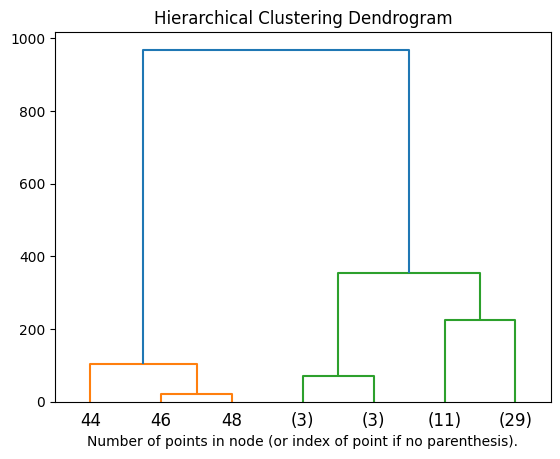

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
X = hasil

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='complete')

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
df['cluster'].value_counts()

0    46
1     3
Name: cluster, dtype: int64

In [1]:
from sklearn.cluster import KMeans

In [3]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(hasil)

NameError: ignored